# SOUDJAY KADHOI, FARIUS AINA ET MOUHAMED DIOP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Exercice 1:**

# 4: a) Implémentation de la projection

In [2]:
# Calcul du gradient
def gradj(A, x, b):
    return 2 * A.T@(A@x - b)

# Détermination de la projection
def proj(x):
    return np.maximum(0, x)

# b) Fonction x = minimise(A, b, tau ,r)

In [3]:
def minimise(A, b, theta, r):
    x = np.zeros((r, 2))
    for i in range(r-1):
        gradient = gradj(A, x[i], b)
        term = x[i]-theta * gradient
        x[i+1] = proj(term)
    return x

# 5: Minimisation de J pour la matrice A et le vecteur b 

In [4]:
A=np.array([[1,2],[-1,3]])
b=np.array([-3,4]).T
vp=np.linalg.eigvals(A.T@A)
xo = np.array([-1,1])

vp[0]/vp[1]**2 # déterminons le critère de convergence
r = 10000
to = 0.001
F = minimise(A,b,to,r)

print(f"x_min = {F[-1]} est le minimiseur de J(x)")
print(f"grad_xmin = {gradj(A, F[-1], b)}")

x_min = [0.         0.46153846] est le minimiseur de J(x)
grad_xmin = [ 1.30769231e+01 -2.66453526e-14]


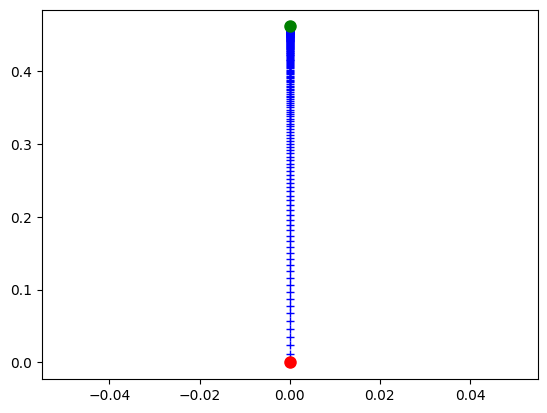

In [5]:
plt.plot(F.T[0],F.T[1], 'b+')
plt.plot(F.T[0][0], F.T[1][0], 'ro', markersize = 8)  # Point initial
plt.plot(F.T[0][-1], F.T[1][-1], 'go' , markersize = 8)  # Point final
plt.savefig('R.png')
plt.title("", pad= 20, fontsize=14, style='italic');

# **Exercice 2:**

##  Tracé de l'ensemble C

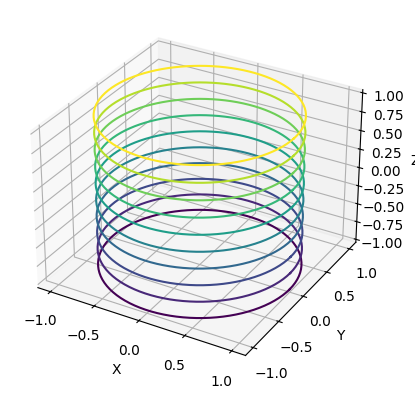

In [6]:
theta = np.linspace(0, 2*np.pi, 100)

x_3 = np.linspace(-1, 1, 10)

r=1

x_1 = r*np.cos(theta)
x_2 = r*np.sin(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(np.linspace(0, 1, len(x_3)))

for zi, color in zip(x_3,colors) :
    ax.plot(x_1, x_2, zi*np.ones_like(theta), color = color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('')
plt.savefig('Cylindre.png')
plt.show()

# 1-c) Définition de la projection

In [7]:
def projection(x):
    n=x[0]**2 + x[1]**2
    z=np.array([x[0]/np.sqrt(n) , x[1]/np.sqrt(n), x[2]])
    return z

#  2-c) Implémentation de la fonction minimise

In [8]:
def minimise1(A, b, theta, r):
    x = np.zeros((r, 3))
    for i in range(r-1):
        gradient = gradj(A, x[i], b)
        term = x[i] - theta * gradient
        x[i+1] = projection(term)
    return x    

# 2-d) Calcul numérique du minimun de J 

In [9]:
A = np.array([[2,1,0],[1,3,1], [1,0,2]]) # matrice de A 
b = np.array([3,1,3]).T  # vecteur b
vp = np.linalg.eigvals(A.T@A)  # calcul des valeurs propres
theta = 0.0004

r = 1000

vp[1]/vp[0]**2

print(f"x_min = {minimise1(A,b,theta, r)[-1]}")

x_min = [ 0.99309582 -0.11730598  0.83966597]


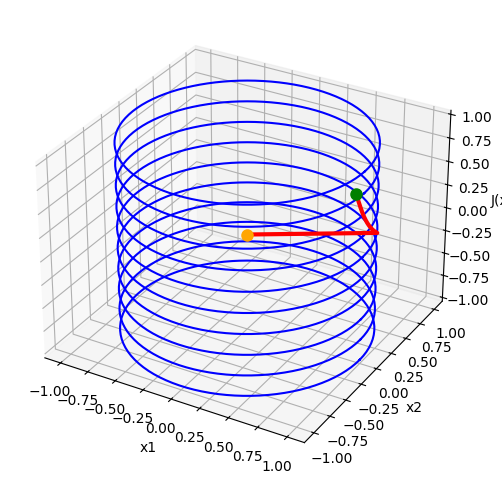

In [10]:
u = minimise1(A, b, theta, r)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
    
for zi in x_3 :
    ax.plot(x_1, x_2,zi*np.ones_like(theta), color='b')

ax.plot(u.T[0], u.T[1],u.T[2], linewidth = 3, color = 'r', linestyle = "-")  # Trajectoire principale
ax.plot(u.T[0][0], u.T[1][0],u.T[2][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u.T[0][-1], u.T[1][-1],u.T[2][-1], marker='o', markersize=8, color='green')
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x)')
ax.set_title('')
plt.savefig('Trajectoire de la méthode du gradient projeté')
plt.show()

In [11]:
np.round(vp[1]/vp[0]**2,4) # Valeur critique

0.0093

 ## 2-e) Nous commençons à observer la divergence au-delà  de 0.0093

# Comme exemple

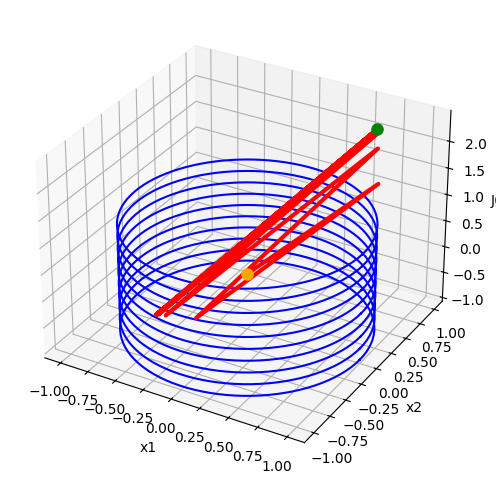

In [12]:
theta= 0.1195

u = minimise1(A,b,theta,r)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
    
for zi in x_3 :
    ax.plot(x_1, x_2,zi*np.ones_like(theta), color='b')

ax.plot(u.T[0], u.T[1],u.T[2], linewidth = 3, color = 'r', linestyle = "-")  # Trajectoire principale
ax.plot(u.T[0][0], u.T[1][0],u.T[2][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u.T[0][-1], u.T[1][-1],u.T[2][-1], marker='o', markersize=8, color='green')
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x)')
ax.set_title('')
plt.savefig('Trajectoire illustrant la divergence.png')
plt.show()

# **Exercice 4:**

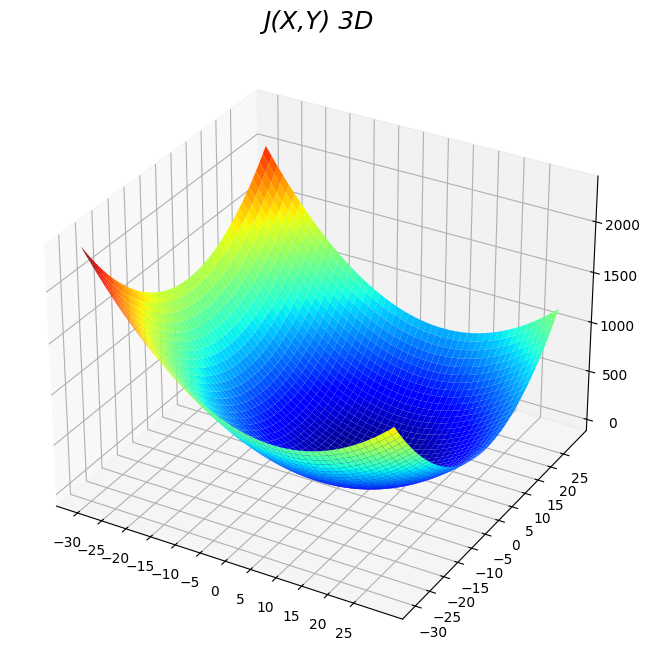

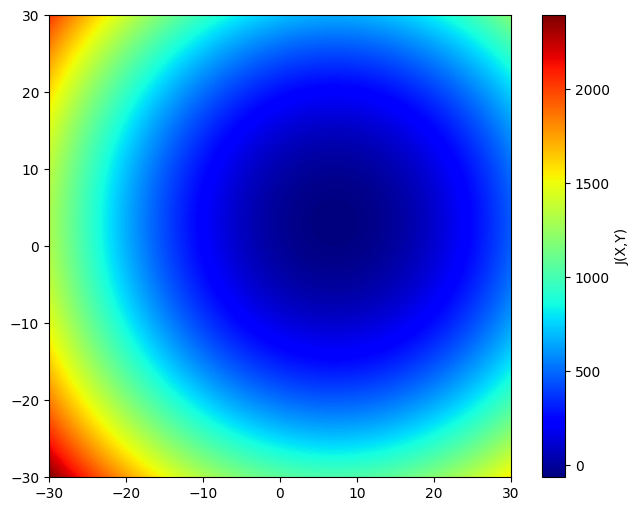

In [13]:
# Fonction à minimisé
def J(x,y):
    return x**2 + y**2 - 14*x - 6*y -7
X = np.arange(-30, 30, 0.1)
Y = np.arange(-30, 30, 0.100)
X, Y = np.meshgrid(X, Y)
Z = J(X,Y)


fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection= '3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabels=('x')
ax.set_ylabels=('y')
ax.set_zlabels=('Z')
ax.set_xticks(np.arange(-30,30,5))
ax.set_yticks(np.arange(-30,30,5))
ax.set_title('J(X,Y) 3D', pad=10, fontsize=18, style='italic')
ax.xaxis.labelpad = 10 ; ax.yaxis.labelpad = 10 ; ax.Zlabelpad = 5 
plt.savefig('J_3D.png')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(Z,extent=[-30, 30 , -30, 30], origin='lower', cmap = "jet")
plt.title('' , fontsize=15,  style='italic')
plt.colorbar(label='J(X,Y)')
plt.savefig('J_2D.png')
plt.show()

In [14]:
# gradient de la fonction de J
def grad_J(x,y):
    return np.array([2*x-14 , 2*y-6])

# Hessienne de la fonction J
def hess_J(x,y) :
    return np.array([[2,0],[0,2]])

# Inverse de la hessienne de la fonction J
def Inv_HessJ(x, y):
    return np.linalg.inv(hess_J(x, y))

# Méthode de Newton

In [15]:
def newton_method(grad_func, hess_func, u0, num_iterations, seuil):
    dim = len(u0)
    u, d, ro = np.zeros((num_iterations, dim)), np.zeros((num_iterations, dim)),np.zeros((num_iterations, dim)) # dim = 2; u = trajectoire
    u[0] = u0
    for k in range(num_iterations-1):
        grad = grad_func(*u[k])
        hess_inv = np.linalg.inv(hess_func(*u[k]))
        update = np.dot(hess_inv, grad)
        u[k+1] = u[k] - update
        if np.linalg.norm(grad) < seuil: return u[:k+1,:], k
    return u, num_iterations

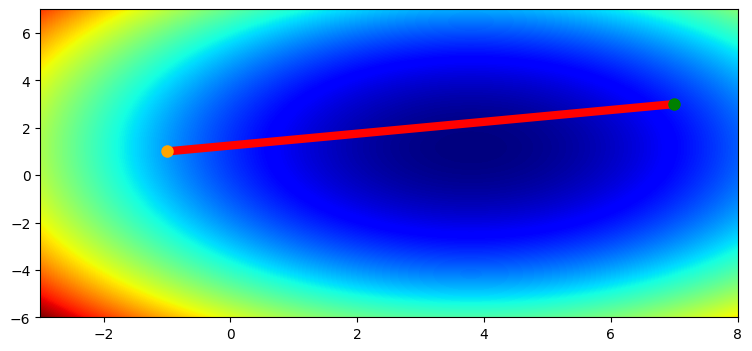

In [16]:
u_0, it_0 = newton_method(grad_J, hess_J, np.array([-1,1]), 1000, 1e-5)

# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-3,8, -6,7], aspect = 'auto', origin = 'lower')
plt.plot(u_0.T[0],u_0.T[1], linewidth = 6, color = "red");
plt.plot(u_0.T[0][0], u_0.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(u_0.T[0][-1], u_0.T[1][-1], marker='o', markersize=8, color='green')  # Point final
#plt.title('Trajectoire de la méthode de Newton', pad= 20, fontsize=14, style='italic');
plt.savefig('N-2.png')

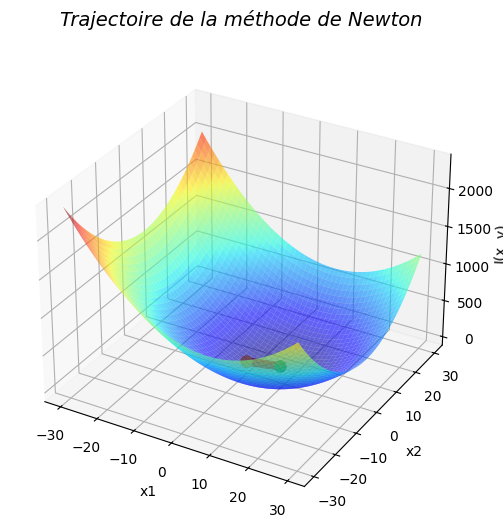

In [17]:
# Affichage en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha = 0.6)
ax.plot(u_0.T[0], u_0.T[1], linewidth = 6, color = "red");
ax.plot(u_0.T[0][0], u_0.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
ax.plot(u_0.T[0][-1], u_0.T[1][-1], marker='o', markersize=8, color='green')  # Point final

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x, y)')
ax.set_title('Trajectoire de la méthode de Newton', pad= 20, fontsize=14, style='italic')
plt.savefig('Newton3.png', bbox_inches='tight', pad_inches=0.4)
plt.show()

# 3-Méthode de pénalisation

### Détermination des contraintes

In [18]:
def phi_1(x,y):
    return x+y-2

def phi_2(x,y):
    return x+2*y-3

def psi(x,y):
    return max(0,phi_1(x,y))**2 + max(0,phi_2(x,y))**2

### Détermination de la fonction J-epsilon 

In [19]:
def J_eps(x,y,eps):
    return J(x,y) + (1/eps)*psi(x,y)

### Calcul du gradient de J-epsilon

In [20]:
def grad_phi1(x,y):
    return np.array([0,0]) if (x+y-2<0) else np.array([2*(x+y-2) , 2*(x+y-2)])

def grad_phi2(x,y):
    return np.array([0,0]) if (x+2*y-3<0) else np.array([2*(x+2*y-3) ,4*(x+2*y-3)])

def grad_psi(x,y):
    return grad_phi1(x,y) + grad_phi2(x,y)


def grad_J_eps(x,y,eps):
        return grad_J(x,y)+(1/eps)*(grad_psi(x,y))

### Méthode du gradient à pas constante

In [21]:
def algo_grad_cons(grad_func, u0, ro, num_itérations, seuil):
    dim = len(u0)
    u = np.zeros((num_itérations, dim))
    u[0] = u0
    for k in range(num_itérations-1) :
        grad = grad_func(*u[k], eps)
        u[k+1] = u[k] - ro*grad
        if np.linalg.norm(grad) < seuil: return u[:k+1,:], k
    return u, num_itérations

###  Paramétres du problème

In [22]:
ro = 0.01
eps = 0.01
num_itérations = 1000
u0 = [-1, 1]
seuil = 1e-6
C, _ = algo_grad_cons(grad_J_eps, u0, ro, num_itérations, seuil)
print(f'Trajectoire: {C}')

Trajectoire: [[-1.          1.        ]
 [-0.84        1.04      ]
 [-0.6832      1.0792    ]
 ...
 [ 3.04015927 -0.95984072]
 [ 2.958719   -1.04128099]
 [ 3.03954462 -0.96045537]]


### Détermination du contrainte la plus active

###### On observe bien que phi_1 est la contrainte  la plus active

### Trajectoire de la méthode

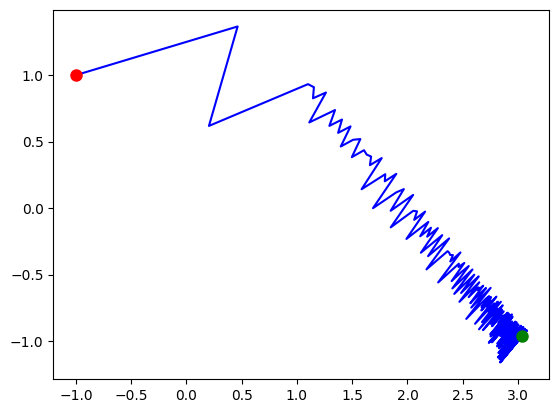

In [23]:
plt.plot(C.T[0],C.T[1], 'b')
plt.plot(C.T[0][0], C.T[1][0], 'ro', markersize = 8)  # Point initial
plt.plot(C.T[0][-1], C.T[1][-1], 'go' , markersize = 8)  # Point final
#plt.title("Trajectoire de la méthode de pénalisation", pad= 20, fontsize=14, style='italic');
plt.savefig('Pena.png', bbox_inches='tight', pad_inches=0.4)

# 4-Minimisation du Lagragien par la méthode du gradient à pas constant

In [24]:
def L(x,y,lambd):
    return J(x,y) + lambd*phi_1(x,y)

def grad_J_lagrange(x,y,lambd):
        return grad_J(x,y) + lambd*grad_phi1(x,y)

In [25]:
def algo_grad_cons_lagrangien(grad_func, u0, ro, num_itérations,lambd, seuil):
    dim = len(u0)
    u = np.zeros((num_itérations, dim))
    u[0] = u0
    for k in range(num_itérations-1) :
        grad = grad_func(*u[k], lambd)
        u[k+1] = u[k] - ro*grad
        if np.linalg.norm(grad) < seuil: return u[:k+1,:], k
    return u, num_itérations

## Application 

In [26]:
ro = 0.01
n = 10000
u0 = np.array([-1,0])
lambd = 10
gcL,_ = algo_grad_cons_lagrangien(grad_J_lagrange, u0, ro, n, lambd, seuil)
print(f'Trajectoire: {gcL}')

Trajectoire: [[-1.          0.        ]
 [-0.84        0.06      ]
 [-0.6832      0.1188    ]
 ...
 [ 3.19047582 -0.80952344]
 [ 3.19047583 -0.80952345]
 [ 3.19047584 -0.80952346]]


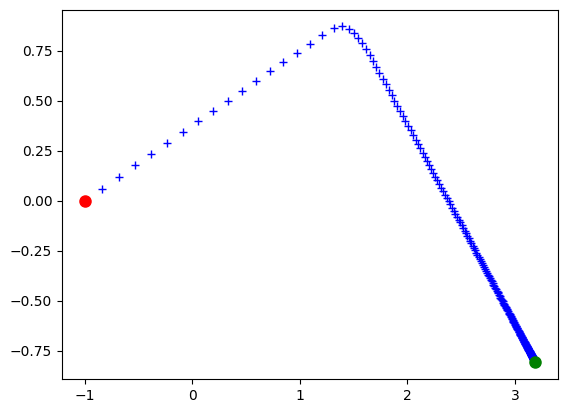

In [27]:
plt.plot(gcL.T[0], gcL.T[1], 'b+')
plt.plot(gcL.T[0][0], gcL.T[1][0], 'ro', markersize = 8)  # Point initial
plt.plot(gcL.T[0][-1], gcL.T[1][-1], 'go' , markersize = 8)  # Point final
#plt.title("Trajectoire de la méthode du gradient à pas constant (Lagrange)", pad= 20, fontsize=14, style='italic');
plt.savefig('Trajectoire de la méthode du gradient à pas constant (Lagrange)')

## 5 Méthode de Newton-Lagrange,

In [28]:
def grad_L(x, y, lambd):
    return [grad_J_lagrange(x,y,lambd), max(0,phi_1(x,y))**2]


def hess_phi1(x, y):
    return np.array([[0,0],[0,0]]) if (x+y-2<0) else np.array([[2,0], [0,2]])
 
def hess_lagrange(x, y, lambd):
    return hess_J(x,y) + lambd*hess_phi1(x,y)    
    
def hess_L(x, y, lambd):
    hess = hess_J(x,y) + lambd*hess_phi1(x,y)
    return [[hess, grad_phi1(x,y)] , [grad_phi1(x,y).T ,np.zeros_like(hess)]]

In [29]:
def newton_method2(grad_func, hess_func, u0, lambd, num_iterations, seuil):
    dim = len(u0)
    u = np.zeros((num_iterations, dim)) # dim = 2; u = trajectoire
    u[0] = u0
    for k in range(num_iterations-1):
        grad = grad_func(*u[k],lambd)
        hess_inv = np.linalg.inv(hess_func(*u[k], lambd))
        update = np.dot(hess_inv, grad)
        u[k+1] = u[k] - update
        if np.linalg.norm(grad) < seuil: return u[:k+1,:], k
    return u, num_iterations

In [30]:
x0 = np.array([-1,1])
lambd = 0

Nl_0, it_0 = newton_method2(grad_J_lagrange, hess_lagrange, x0, lambd, 2, 1e-5)

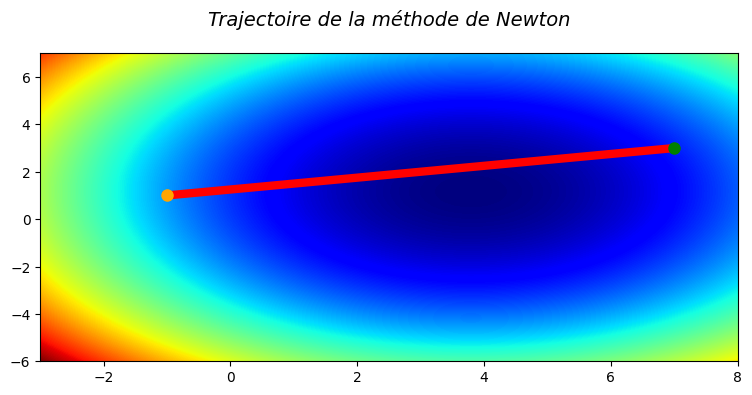

In [32]:
# Trajectoire sur l'image 2D
plt.figure(figsize=(9,4), dpi=100)
plt.imshow(Z, cmap = 'jet', extent=[-3,8, -6,7], aspect = 'auto', origin = 'lower')
plt.plot(Nl_0.T[0], Nl_0.T[1], linewidth = 6, color = "red");
plt.plot(Nl_0.T[0][0], Nl_0.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(Nl_0.T[0][-1], Nl_0.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title('Trajectoire de la méthode de Newton', pad= 20, fontsize=14, style='italic');